<a href="https://colab.research.google.com/github/nilamaula26/Praktikum-Kuliah/blob/main/Tugas%20Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('/content/Naive Bayes.xlsx')
df.head()

,ipk_4,jenis_kelamin,kota_lahir,tipe_sekolah,kota_sekolah,lama_studi
0,3,Perempuan,Luar Kota,Kejuruan,Luar Kota,Tepat Waktu
1,3,Perempuan,Luar Kota,Umum,Luar Kota,Tepat Waktu
2,3,Perempuan,Dalam Kota,Umum,Dalam Kota,Tepat Waktu
3,3,Laki-Laki,Dalam Kota,Umum,Dalam Kota,Tepat Waktu
4,2,Perempuan,Dalam Kota,Umum,Dalam Kota,Tepat Waktu


In [2]:
#Mengubah data menjadi integer
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

encoded_data = ordinal_encoder.fit_transform(df[['jenis_kelamin', 'kota_lahir','tipe_sekolah',
                                                 'kota_sekolah','lama_studi']])

encoded_data = encoded_data.astype(int)

jeniskelamin_dict = {encoded_value: category_label
                   for encoded_value, category_label
                   in zip(encoded_data[:, 0], df['jenis_kelamin'])}
kotalahir_dict = {encoded_value: category_label
               for encoded_value, category_label
               in zip(encoded_data[:, 1], df['kota_lahir'])}
tipesekolah_dict = {encoded_value: category_label
               for encoded_value, category_label
               in zip(encoded_data[:, 2], df['tipe_sekolah'])}
kotasekolah_dict = {encoded_value: category_label
               for encoded_value, category_label
               in zip(encoded_data[:, 3], df['kota_sekolah'])}
lamastudi_dict = {encoded_value: category_label
               for encoded_value, category_label
               in zip(encoded_data[:, 4], df['lama_studi'])}
df[['jenis_kelamin', 'kota_lahir','tipe_sekolah','kota_sekolah',
    'lama_studi']] = encoded_data

print(jeniskelamin_dict)
print(kotalahir_dict)
print(tipesekolah_dict)
print(kotasekolah_dict)
print(lamastudi_dict)

{1: 'Perempuan', 0: 'Laki-Laki'}
{1: 'Luar Kota', 0: 'Dalam Kota'}
{0: 'Kejuruan', 1: 'Umum'}
{1: 'Luar Kota', 0: 'Dalam Kota'}
{0: 'Tepat Waktu', 1: 'Tidak Tepat Waktu'}


In [3]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1)
print(X_test)

[[3 0 0 1 0]
 [4 0 1 1 1]
 [4 0 1 1 1]
 [2 0 1 0 1]
 [3 1 0 1 0]
 [3 1 0 0 0]
 [2 1 0 1 0]
 [2 0 0 1 0]]


In [4]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, Y_train);

y_pred = model.predict(X_test)

In [5]:
print("Hasil Prediksi:",y_pred)
print("Nilai Sebenarnya:",Y_test)

Hasil Prediksi: [0 1 1 1 0 1 0 1]
Nilai Sebenarnya: [0 0 1 1 0 1 0 0]


In [6]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
)

accuray = accuracy_score(y_pred, Y_test)
f1 = f1_score(y_pred, Y_test, average="weighted")

print("Confussion matrix:\n", confusion_matrix(y_pred, Y_test))
print("Accuracy:", accuray)
print("F1 Score:", f1)

Confussion matrix:
 [[3 0]
 [2 3]]
Accuracy: 0.75
F1 Score: 0.7499999999999999


<ipython-input-7-1c5f697a2094>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_pca[Y_train == j, 0], X_train_pca[Y_train == j, 1],


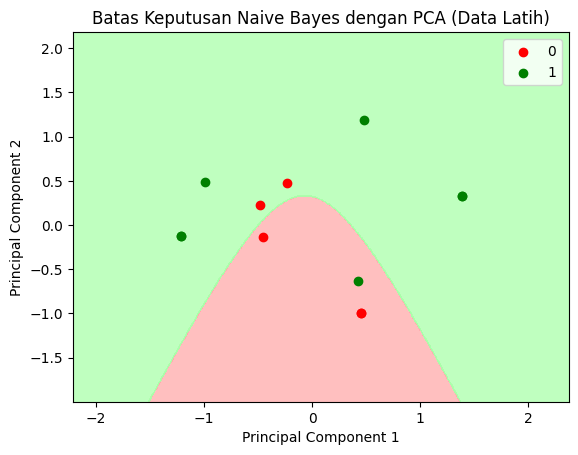

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
# Menggunakan PCA untuk mereduksi dimensi ke 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Membuat meshgrid untuk memvisualisasikan batas keputusan
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

# Melatih model Naive Bayes pada data yang direduksi dimensinya
model.fit(X_train_pca, Y_train)

# Menggunakan model untuk memprediksi kategori pada setiap titik pada meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting contour plot
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.contourf(xx, yy, Z, alpha=0.75, cmap=cmap_background)

# Plotting scatter plot untuk data latih yang direduksi dimensinya
cmap_points = ListedColormap(['red', 'green'])
for i, j in enumerate(np.unique(Y_train)):
    plt.scatter(X_train_pca[Y_train == j, 0], X_train_pca[Y_train == j, 1],
                c=cmap_points(i), label=j)

plt.title('Batas Keputusan Naive Bayes dengan PCA (Data Latih)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()